# Analiza eksploracyjna i test statystyczny

#### <b>Marta Szymańska</b> 
##### <b>Indeks: 151481</b>
___

### Opis zbioru danych

Muzykoterapia, czyli MT, polega na wykorzystaniu muzyki do poprawy stresu, nastroju i ogólnego stanu zdrowia psychicznego danej osoby. MT jest również uznawana za praktykę opartą na dowodach, wykorzystującą muzykę jako katalizator dla „szczęśliwych” hormonów, takich jak oksytocyna. MT wykorzystuje szeroką gamę różnych gatunków.

Zbiór danych, który udało mi się znaleźć, ma na celu określenie, jakie korelacje istnieją między indywidualnym gustem muzycznym, a zgłaszanym przez badanych zdrowiem psychicznym. W idealnym przypadku odkrycia te mogłyby przyczynić się do bardziej świadomego zastosowania MT lub po prostu dostarczyć interesujących widoków na temat umysłu.

Zestaw danych, który wykorzystałam, pochodzi z platformy internetowej kaggle.com: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results.
<br>
Wybrane dane obejmują próbę 736 badanych osób. Respondenci nie byli ograniczeni wiekiem ani lokalizacją. Ankieta była przeprowadzana wśród różnych osób, szerzona głównie poprzez platformy takie jak Discord, Reddit i inne social media. Plakaty i „wizytówki” były również używane do reklamowania formularza w bibliotekach, parkach i innych miejscach publicznych. 
<br>
<b>Blok 1</b>: Gatunki muzyczne <br>
Ankietowani oceniają, jak często słuchają 16 gatunków muzycznych, gdzie mogą wybrać:
- Nigdy
- Rzadko
- Czasami
- Bardzo często <br>

<b>Blok 2</b>: Zdrowie psychiczne <br>
Respondenci oceniają lęk, depresję, bezsenność i zaburzenia obsesyjno-kompulsyjne w skali od 0 do 10, gdzie: <br>
0 - nie doświadczam tego. <br>
10 - Doświadczam tego regularnie, stale/lub do skrajności. <br>
<br>
Baza zawiera 33 atrubuty, tj.:
Nazwa atrybutu - Rodzaj danych 
- <b>Timestamp</b> - Jakościowe <br>       
- <b>Age</b> - Ilościowe<br> 
- <b>Primary streaming service</b> - Jakościowe<br> 
- <b>Hours per day</b> - Ilościowe<br> 
- <b>While working</b> - Jakościowe<br> 
- <b>Instrumentalist</b> - Jakościowe<br> 
- <b>Composer</b> - Jakościowe<br> 
- <b>Fav genre</b> - Jakościowe<br> 
- <b>Exploratory</b> - Jakościowe<br> 
- <b>Foreign languages</b> - Jakościowe<br> 
- <b>BPM</b> - Ilościowe<br> 
- <b>Frequency [Classical]</b> - Jakościowe<br> 
- <b>Frequency [Country]</b> - Jakościowe<br> 
- <b>Frequency [EDM]</b> - Jakościowe<br> 
- <b>Frequency [Folk]</b> - Jakościowe<br> 
- <b>Frequency [Gospel]</b> - Jakościowe<br> 
- <b>Frequency [Hip hop]</b> - Jakościowe<br> 
- <b>Frequency [Jazz]</b> - Jakościowe<br> 
- <b>Frequency [K pop]</b> - Jakościowe<br> 
- <b>Frequency [Latin]</b> - Jakościowe<br> 
- <b>Frequency [Lofi]</b> - Jakościowe<br> 
- <b>Frequency [Metal]</b> - Jakościowe<br> 
- <b>Frequency [Pop]</b> - Jakościowe<br> 
- <b>Frequency [R&B]</b> - Jakościowe<br> 
- <b>Frequency [Rap]</b> - Jakościowe<br> 
- <b>Frequency [Rock]</b> - Jakościowe<br> 
- <b>Frequency [Video game music]</b> - Jakościowe<br> 
- <b>Anxiety</b> - Ilościowe<br> 
- <b>Depression</b> - Ilościowe<br> 
- <b>Insomnia</b> - Ilościowe<br> 
- <b>OCD</b> - Ilościowe<br> 
- <b>Music effects</b> - Jakościowe<br> 
- <b>Permissions</b> - Jakościowe<br> 


### Analiza eksploracyjna

Wczytanie danych:

In [1]:
dirtyData <- read.csv('mxmh_survey_results.csv')

Przed przystąpieniem do analizy należy wyczyszcić dane. W tym przypadku zostały usunięte wszystkie wiersze, w których brakowało wartości numerycznych oraz niektórych jakościowych. Z tego powodu liczba osób zmniejszyła się.

In [2]:
data <- subset(dirtyData,(!is.na(dirtyData["Age"]) & !is.na(dirtyData["Anxiety"])) & !is.na(dirtyData["Depression"]) & !is.na(dirtyData["Insomnia"]) & !is.na(dirtyData["OCD"]) & !is.na(dirtyData["Hours.per.day"]) & !is.na(dirtyData["BPM"]))
data <- data[-which(data$While.working == ""), ]
data <- data[-which(data$Instrumentalist == ""), ]
data <- data[-which(data$Music.effects == ""), ]
data <- data[-which(data$Foreign.languages == ""), ]
head(data)

,Timestamp,Age,Primary.streaming.service,Hours.per.day,While.working,Instrumentalist,Composer,Fav.genre,Exploratory,Foreign.languages,⋯,Frequency..R.B.,Frequency..Rap.,Frequency..Rock.,Frequency..Video.game.music.,Anxiety,Depression,Insomnia,OCD,Music.effects,Permissions
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
4,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
5,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
6,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.
7,8/27/2022 22:00:29,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,⋯,Rarely,Never,Never,Sometimes,4,8,6,0,Improve,I understand.
8,8/27/2022 22:18:59,21,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,⋯,Sometimes,Rarely,Never,Rarely,5,3,5,3,Improve,I understand.


Struktura danych:

In [695]:
str(data)

'data.frame':	619 obs. of  33 variables:
 $ Timestamp                   : chr  "8/27/2022 21:28:18" "8/27/2022 21:40:40" "8/27/2022 21:54:47" "8/27/2022 21:56:50" ...
 $ Age                         : int  18 61 18 18 18 21 19 18 19 19 ...
 $ Primary.streaming.service   : chr  "Spotify" "YouTube Music" "Spotify" "Spotify" ...
 $ Hours.per.day               : num  4 2.5 4 5 3 1 6 1 8 2 ...
 $ While.working               : chr  "No" "Yes" "Yes" "Yes" ...
 $ Instrumentalist             : chr  "No" "No" "No" "Yes" ...
 $ Composer                    : chr  "No" "Yes" "No" "Yes" ...
 $ Fav.genre                   : chr  "Video game music" "Jazz" "R&B" "Jazz" ...
 $ Exploratory                 : chr  "No" "Yes" "Yes" "Yes" ...
 $ Foreign.languages           : chr  "Yes" "Yes" "No" "Yes" ...
 $ BPM                         : int  132 84 107 86 66 95 94 155 125 88 ...
 $ Frequency..Classical.       : chr  "Never" "Sometimes" "Never" "Rarely" ...
 $ Frequency..Country.         : chr  "Never" "Neve

Zbiór danych jest dość bogaty pod względem różnyh cech, co utrudnia pełne zrozumienie treści. Z tego powodu wybrane kolumny zostały poddane analizie osobno. Dane zostaną przedstawione czytelnie i w sposób wizualny.

### Szereg rozdzielczy przedziałowy

Wyliczenie rozstępu badanej cechy:

In [696]:
R <- max(data$Age)-min(data$Age)
paste("Rozstęp [w latach]: ",R)

[1] "Rozstęp [w latach]:  79"

Decyzja o liczbie przedziałów k, korzystajać ze wzorów kilku popularnych heurystyk:

In [697]:
n <- length(data$Age)
k1 <- sqrt(n)
k2 <- 1+3.322*log(n)
k3 <- 5*log(n)
k4 <- R/(2.64*n^(-1/3)*IQR(data$Age)) # IQR - rozst˛ep mi˛edzykwartylowy
l_klas <- matrix(c(k1,k2,k3,k4),dimnames = list(c("sqrt(n)", "1+3.322log(n)","5log(n)", "(age_max-age_min)/h"),c("liczba klas")))
l_klas

,liczba klas
sqrt(n),24.87971
1+3.322log(n),22.35417
5log(n),32.14053
(age_max-age_min)/h,28.33637


Wyliczone liczności przedziałów są zbliżone do siebie. Dwie z nich są prawie równe, zatem jako k zostaje przyjęta zaokrąglona wartość jednej z nich. 

In [698]:
k <- round(k1)

Wyliczenie szerokości przedziałów:

In [699]:
h1 <- 2.64*n^(-1/3)*IQR(data$Age)
h2 <- R/k
span_of_range <- matrix(c(h1,h2),dimnames = list(c("2.64*n^(-1/3)*IQR", "(age_max-age_min)/k"),c("rozpiętość przedziału")))
span_of_range

,rozpiętość przedziału
2.64*n^(-1/3)*IQR,2.787937
(age_max-age_min)/k,3.160000


In [700]:
h <- ceiling(h1)

Utworzenie szeregu rozdzielczego przedziałowego. Przedziały są lewostronnie otwarte i prawostronnie zamknięte. 

In [701]:
paste("age_min: ", min(data$Age))

[1] "age_min:  10"

In [702]:
beginning <- min(data$Age) - 1
paste("Początek pierwszego przedziału: ", beginning)

[1] "Początek pierwszego przedziału:  9"

Zliczenie obserwacji w poszczególnych przedziałach:

In [703]:
inclusive_series <- data.frame(nr.klasy = seq(1, k))
inclusive_series$początek.klasy <- beginning + (inclusive_series$nr.klasy - 1)*h
inclusive_series$koniec.klasy <- beginning + (inclusive_series$nr.klasy - 1)*h + h
inclusive_series$srodek.klasy <- (inclusive_series$początek.klasy+inclusive_series$koniec.klasy)/2 
inclusive_series$liczebnosc.klasy <- NA

for (i in 1:k) {
  inclusive_series$liczebnosc.klasy[i] <- 
    sum(data$Age > inclusive_series$początek.klasy[i] & data$Age <= inclusive_series$koniec.klasy[i])
}

inclusive_series

nr.klasy,początek.klasy,koniec.klasy,srodek.klasy,liczebnosc.klasy
<int>,<dbl>,<dbl>,<dbl>,<int>
1,9,12,10.5,2
2,12,15,13.5,42
3,15,18,16.5,162
4,18,21,19.5,134
5,21,24,22.5,80
6,24,27,25.5,50
7,27,30,28.5,31
8,30,33,31.5,28
9,33,36,34.5,19


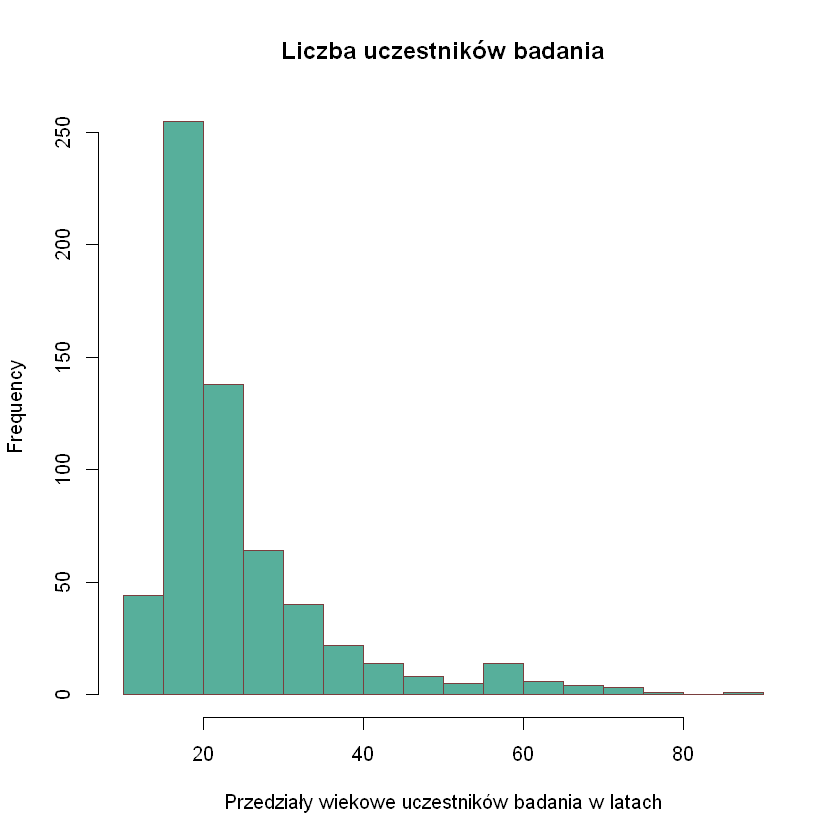

In [704]:
library("plotly")
histogram <- hist(data$Age, main="Liczba uczestników badania", xlab="Przedziały wiekowe uczestników badania w latach", breaks=k, col="#57af9b", border="#7A3E3E")

### Szereg rozdzielczy punktowy

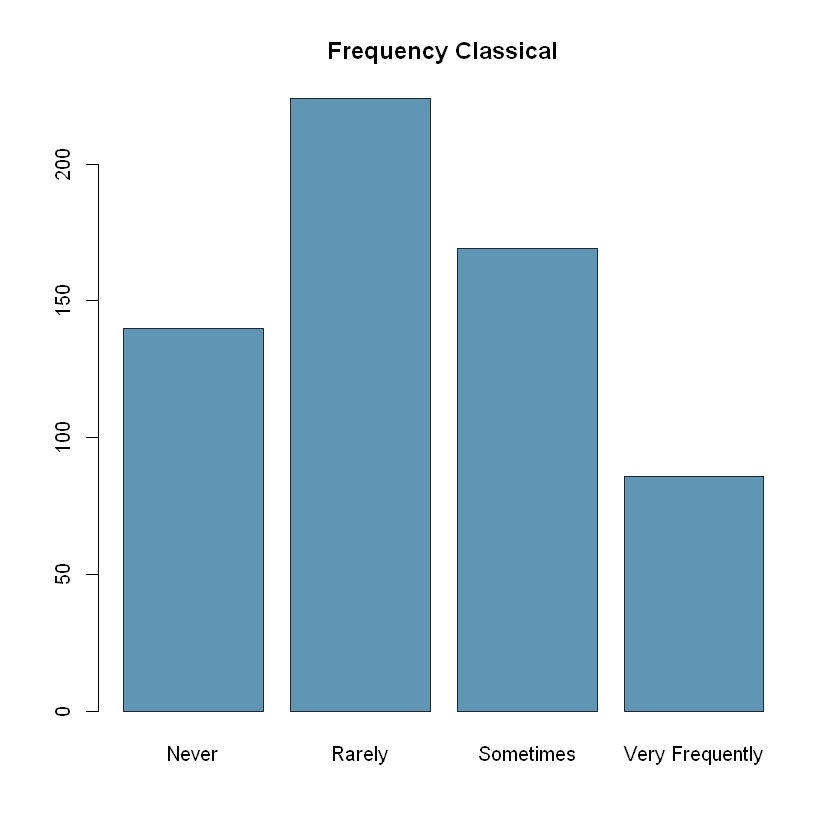

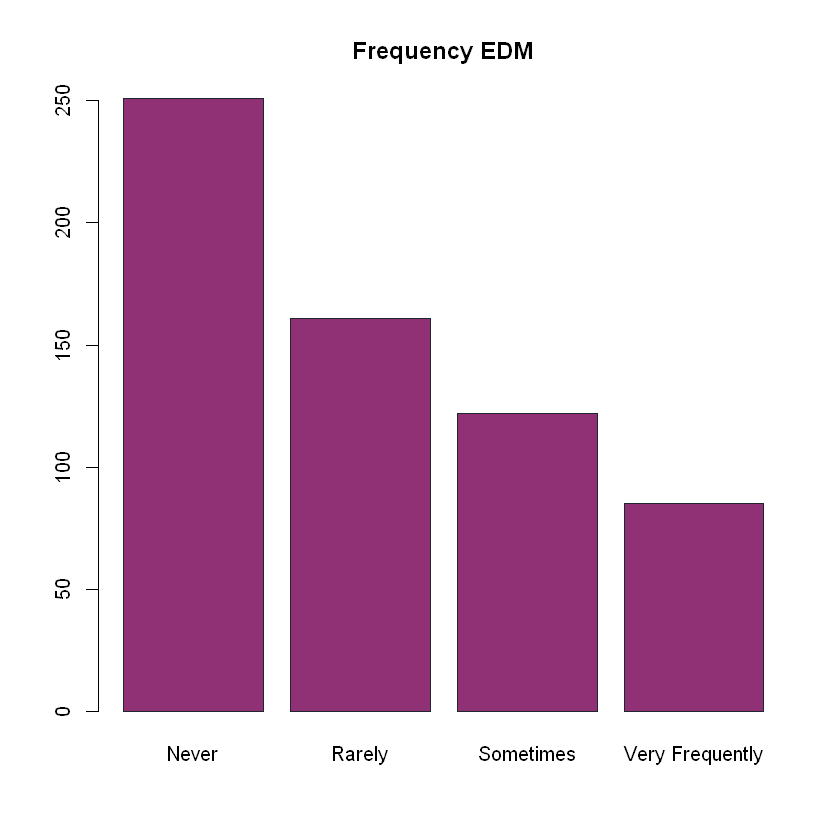

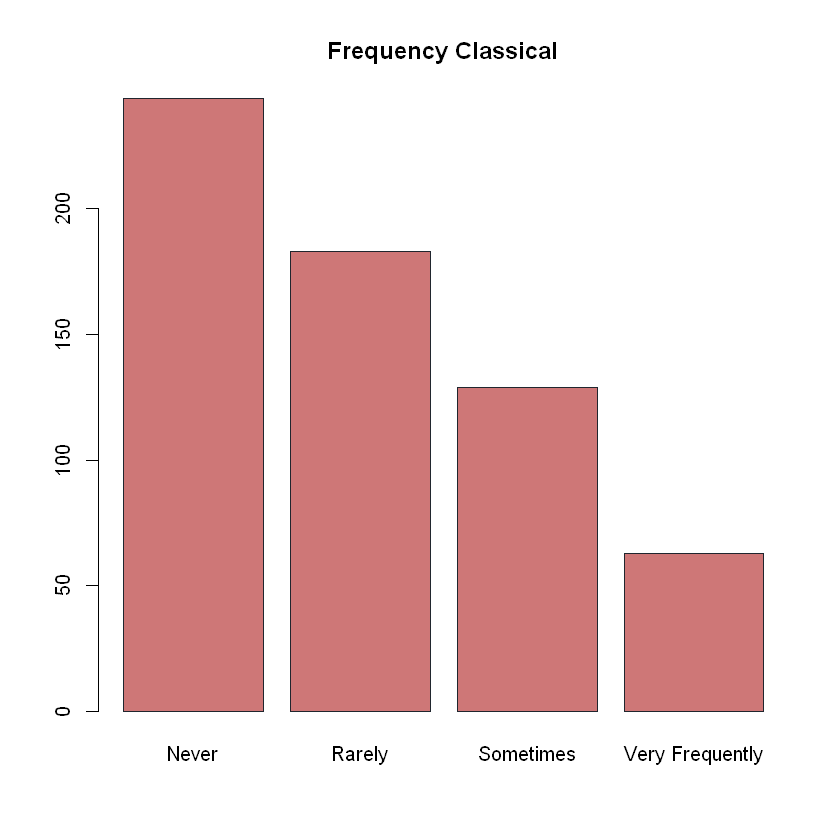

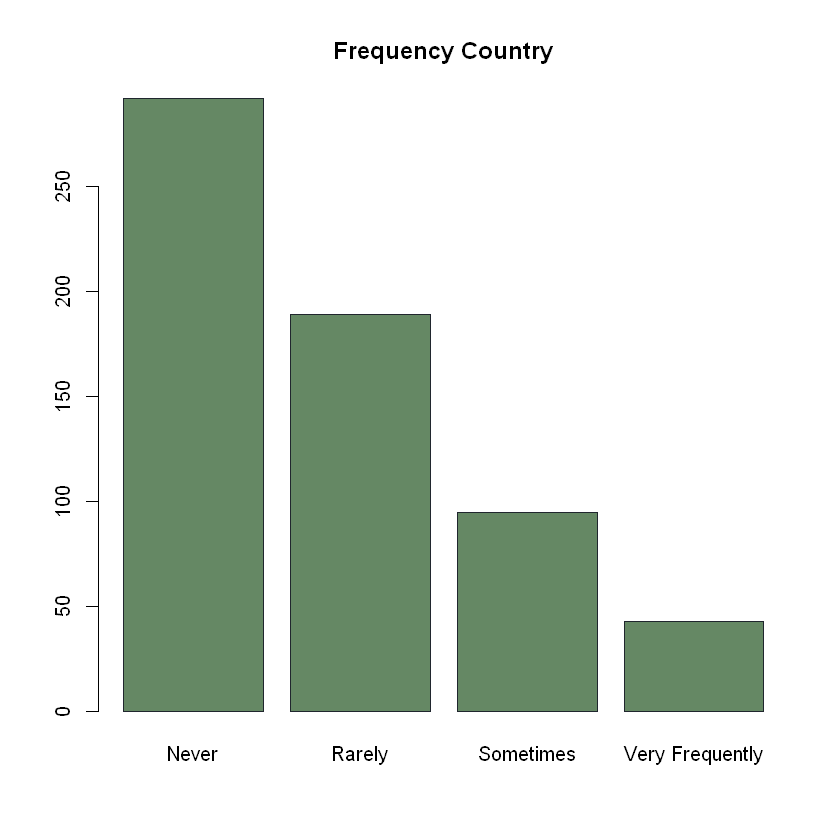

In [705]:
freq_Classical <- data.frame(opinion = c('Never', 'Rarely', 'Sometimes', 'Very Frequently'), number = matrix(table(data$Frequency..Classical.)))
freq_Country<- data.frame(opinion = c('Never', 'Rarely', 'Sometimes', 'Very Frequently'), number = matrix(table(data$Frequency..Country.)))
freq_EDM <- data.frame(opinion = c('Never', 'Rarely', 'Sometimes', 'Very Frequently'), number = matrix(table(data$Frequency..EDM.)))
freq_Folk <- data.frame(opinion = c('Never', 'Rarely', 'Sometimes', 'Very Frequently'), number = matrix(table(data$Frequency..Folk.)))


barplot(freq_Classical$number,names.arg=freq_Classical$opinion, main = "Frequency Classical", col="#6096B4", border="#20262E")
barplot(freq_EDM$number,names.arg=freq_EDM$opinion, main = "Frequency EDM", col="#913175", border="#20262E")
barplot(freq_Folk$number,names.arg=freq_Folk$opinion, main = "Frequency Classical", col="#CE7777", border="#20262E")
barplot(freq_Country$number,names.arg=freq_Country$opinion, main = "Frequency Country", col="#658864", border="#20262E")


# barplotsTogother

### Wartości statystyk opisowych

#### Miary położenia

Na zmienne zawierające dane pomiarowe lub liczności składają się z setek wartości. Podstawowym zadaniem w badaniach eksploracyjnych jest określenie tendencji centralnej. W przypadku podanych danych będziemy porównywać ze sobą dwie próbki - rozkład liczby godzin słuchania muzyki wśród osób, które jednocześnie preferują utwory w języku ojczystym lub zagranicznym. Dzięki temu porównamy liczbę godzin spędzonych z muzyką w trakcie dnia ze względu język, w jakim przeważnie jest słuchana.

In [707]:
lang = list(foreign=c(),notforeign=c())
for (i in 1:length(data$Foreign.languages)) {
    if(grepl("Yes",data$Foreign.languages[i])){
        lang$foreign <- c(lang$foreign, data$Hours.per.day[i])
    } else {
        lang$notforeign <- c(lang$notforeign, data$Hours.per.day[i])
    }
}

Wyliczenie trach miar: średniej, mediany i dominanty:

In [708]:
mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

miary_centr <- data.frame(film = c("Foreign music","Not foreign music"),
                          dominanta = c(mode(lang$foreign),mode(lang$notforeign)),
                          mediana = c(median(lang$foreign),median(lang$notforeign)),
                          średnia = c(mean(lang$foreign),mean(lang$notforeign)))

miary_centr

film,dominanta,mediana,średnia
<chr>,<dbl>,<dbl>,<dbl>
Foreign music,2,3,3.920487
Not foreign music,1,2,3.416481


In [709]:
summary(lang$foreign)
summary(lang$notforeign)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    3.00    3.92    5.00   24.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   3.416   4.000  24.000 

Wartości dominanty, mediany i średniej w obu zbiorach różnią się. W przypadku zagranicznej muzyki dominuje wartość 2 godzin, a środkowa wartość to 3 godziny. Wartości w drugim zbiorze są odpowiednio o 1 godzinę mniejsze. Średnie również nieznacznie się różnią. 

Mediana jest częściej używana w statystyce niż średnia arytmetyczna ze względu na większą odporność na wartości skrajne. Średnie są silnie narażone na działanie wartości skrajnych. W tym przypadku jednak ze względu na stosunkowo małe dane można oprzeć wnioski również na średniej (po szybkiej analizie nie znalazłam wartości odstających). Na podstawie tych trzech wartości można wywnioskować, że większą popularnością cieszą się utwory zagraniczne, w języku innym niż ojczysty wśród uczestników ankiety.

Wartości tych trzech miar wskazują skośność obserwowanego rozkładu. 
Dzięki zależności dominanta < mediana < średnia można stwierdzić, że mamy do czynienia z asymetrią prawostronną.

#### Miary rozproszenia

In [710]:
skośność <- function(x){
    mean((x-mean(x))^3)/ (sqrt(mean((x-mean(x))^2)))^3
}

kurtoza <- function(x){
    mean((x-mean(x))^4)/ (sqrt(mean((x-mean(x))^2)))^4
}

miary_rozpr <- data.frame(lang = c("Foreign","Notforeign"),
                          wariancja = c(var(lang$foreign),var(lang$notforeign)),
                          odchylenie_st = c(sd(lang$foreign),sd(lang$notforeign)),
                          skośność = c(skośność(lang$foreign),skośność(lang$notforeign)),
                          kurtoza = c(kurtoza(lang$foreign),kurtoza(lang$notforeign)))

miary_rozpr

lang,wariancja,odchylenie_st,skośność,kurtoza
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Foreign,8.368839,2.892895,2.020626,10.38592
Notforeign,10.623677,3.259398,2.928448,15.66503


Na podstawie wartości wariancji i odchylenia standardowego można stwierdzić, że w obu próbkach występuje mała zmienność wyników oraz rozproszenia wokół średniej. Podobnie jak wcześniej wnioskowano, oba rozkłady są prawostronnie skośne, ponieważ miara skośności jest większa od 0. Dodatnie wartości kurtozy wskazują na większe skupienie wyników i bardziej wydłużony rozkład wartości. W obu przypadkach bardzo wysoka kurtoza oznacza, że odchylenia od średniej w wariancji wynikają głównie z rzadkich obserwacji.

Tabela szeregu rozdzielczego:

In [711]:
res_foreign <- hist(lang$foreign, plot="FALSE") 
freq_tab_foreign <- data.frame(nr.klasy = seq(1, length(res_foreign$counts)),
                           poczatek.klasy  = head(res_foreign$breaks,-1),
                           koniec.klasy    = tail(res_foreign$breaks,-1),
                           srodek.klasy    = res_foreign$mids,
                           liczebnosc.klasy= res_foreign$counts)

res_notforeign <- hist(lang$notforeign, plot="FALSE") 
freq_tab_notforeign <- data.frame(nr.klasy = seq(1, length(res_notforeign$counts)),
                              poczatek.klasy  = head(res_notforeign$breaks,-1),
                              koniec.klasy    = tail(res_notforeign$breaks,-1),
                              srodek.klasy    = res_notforeign$mids,
                              liczebnosc.klasy= res_notforeign$counts)

paste("Szereg rodzielczy dla badanych słuchających zagranicznej muzyki:")
freq_tab_foreign
paste("Szereg rodzielczy dla badanych nie słuchających zagranicznej muzyki:")
freq_tab_notforeign

[1] "Szereg rodzielczy dla badanych słuchających zagranicznej muzyki:"

nr.klasy,poczatek.klasy,koniec.klasy,srodek.klasy,liczebnosc.klasy
<int>,<dbl>,<dbl>,<dbl>,<int>
1,0,2,1,127
2,2,4,3,114
3,4,6,5,61
4,6,8,7,21
5,8,10,9,16
6,10,12,11,7
7,12,14,13,1
8,14,16,15,1
9,16,18,17,0


[1] "Szereg rodzielczy dla badanych nie słuchających zagranicznej muzyki:"

nr.klasy,poczatek.klasy,koniec.klasy,srodek.klasy,liczebnosc.klasy
<int>,<dbl>,<dbl>,<dbl>,<int>
1,0,2,1,138
2,2,4,3,72
3,4,6,5,27
4,6,8,7,20
5,8,10,9,6
6,10,12,11,2
7,12,14,13,0
8,14,16,15,2
9,16,18,17,1


Wizualizacja danych: <br>
Dominanta - kolor czerwony. <br>
Mediana - kolor niebieski. <br>
Średnia dla próby - kolor fioletowy. <br>

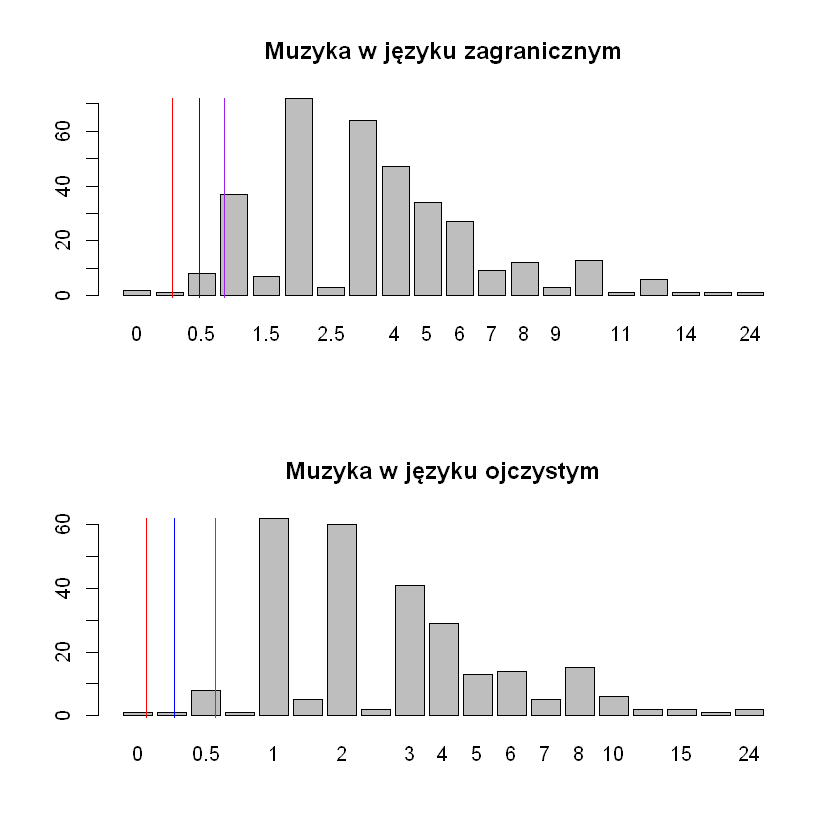

In [712]:
par(mfrow=c(2,1))
barplot(table(lang$foreign), main=paste("Muzyka w języku zagranicznym"))
abline(v=mean(lang$foreign), col="purple")
abline(v=mode(lang$foreign), col="red")
abline(v=median(lang$foreign), col="blue")
barplot(table(lang$notforeign), main=paste("Muzyka w języku ojczystym"))
abline(v=mean(lang$notforeign), col="purple")
abline(v=mode(lang$notforeign), col="red")
abline(v=median(lang$notforeign), col="blue")

### Korelacja i regresja

Sprawdźmy, czy istnieje zależność między ocenami stanów depresji oraz lęku, które deklarują nasi badani.

[1] 0.5304732

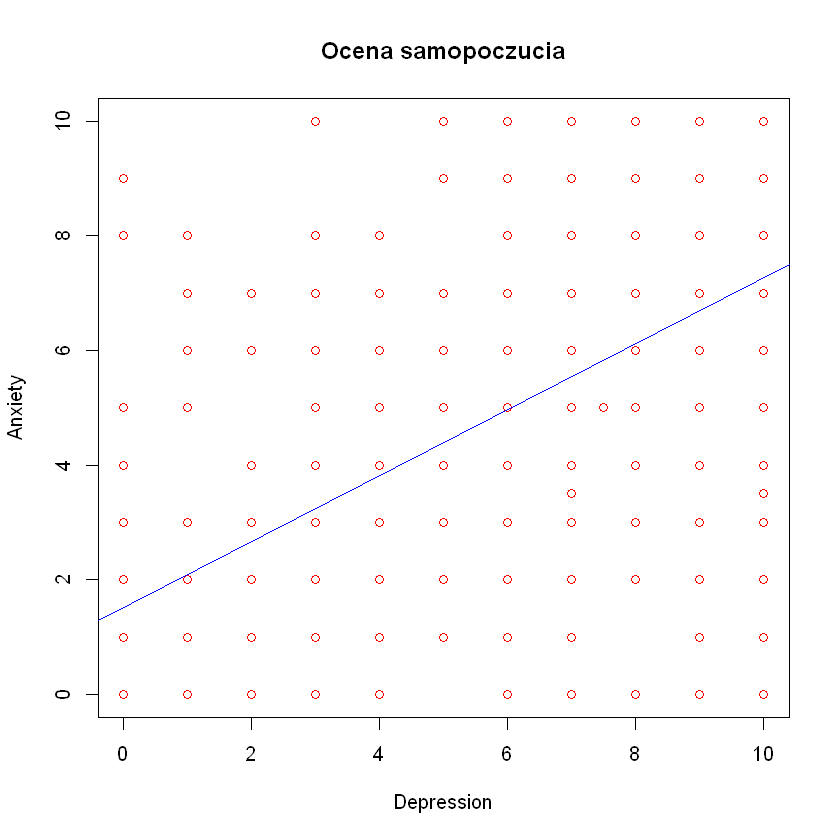

In [713]:
plot(data$Depression ~ data$Anxiety, col="red", main = "Ocena samopoczucia", xlab = "Depression", ylab = "Anxiety")
abline(model, col="blue")
cor(data$Depression, data$Anxiety)

In [714]:
model <- lm(data$Depression ~ data$Anxiety, data)
model


Call:
lm(formula = data$Depression ~ data$Anxiety, data = data)

Coefficients:
 (Intercept)  data$Anxiety  
      1.5164        0.5754  


In [715]:
measure <- data.frame(kowariancja = cov(data$Depression,data$Anxiety),
                          korelacja = cor(data$Depression,data$Anxiety),
                          korelacja_kwadrat = cor(data$Depression,data$Anxiety)^2)

measure

kowariancja,korelacja,korelacja_kwadrat
<dbl>,<dbl>,<dbl>
4.40187,0.5304732,0.2814018


Otrzymane wartości współczynnika korelacji podniesionego do kwadratu wskazują na średnią korelację pomiędzy ocenami stanów depresji oraz lęku wśród badanych. Kierunek tej zależności jest pozytywny, co widać na wykresie.

#### Najważniejsze wnioski i obserwacje

1. Skonstrułowane na podstawie szeregów rozdzielczych dla rozkładów wieku uczestników badania oraz ocen częstotliwości słuchania danych gatunków muzycznych histogramy pokazują, że pierwszy z nich ma rozkład unimodalny, dwuwierzchołkowy, a pozostałe wymienione - głównie unimodalne, wielowierzchołkowe.
2. W pierwszym histogramie największy peak znajduje się dla przedziału wiekowego (15, 18> lat, kolejny dla (19,21> lat. Natomiast wraz ze zwiększającymi się wartościami na osi x - liczba osób spada. W ostatniej klasie liczba ta wynosi 0.
3. W przypadku szeregów punktowych wśród badanych atrybutów jedynie rozkład częstotliwości słuchania muzyki klasycznej jest dwustronnie symetryczny. W przypadku pozostałych trzech rozkładów - są one asymetryczne prawostronnie.
4. Oba rozkłady dotyczące słuchania muzyki w języku ojczystym, bądź zagranicznym są prawostronne.
5. Dodatnie wartości kurtozy w obu rozkładach wskazują na większe skupienie wyników i bardziej wydłużony rozkład wartości.
6. Współczynnik korelacji świadczy o dość słabej, ale istniejącej zależności pomiedzy badanymi cechami: oceną samopoczucia w kwestii depresji oraz lęków. 

### Testy statystyczne

#### Test T

Wylosujmy próbę 100 osób z bazy:

In [716]:
sampleT <- data[sample(nrow(data), 100), ]

W tym teście skupimy się na rozkładzie liczby beatów na minutę. Należy obliczyć średnią oraz odchylenie standardowe w naszej próbie, natomiast σ populacji jest nam nieznane. Zakładam, że dane pochodzą z rozkładu normalnego.

In [717]:
length_music <- data.frame(średnia = mean(sampleT$BPM),odch_st = sd(sampleT$BPM))
length_music

średnia,odch_st
<dbl>,<dbl>
124.03,35.39059


Sprawdzając średnią liczbę uderzeń w próbie i odchylenie standardowe można sformułować pytanie, czy średnio w całej populacji są to 124 uderzenia na minutę w słuchanych utworach.

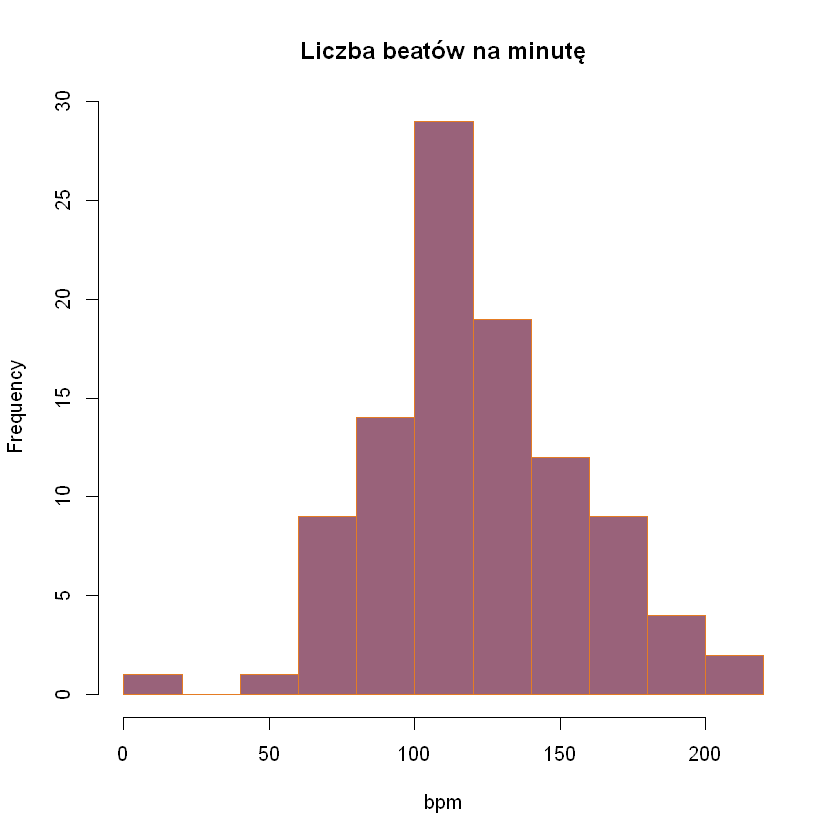

In [718]:
hist(sampleT$BPM, main="Liczba beatów na minutę", xlab="bpm", col="#99627A", border="#E57C23")

Warunki testu T są spełnione. Hipotezy do testu dwustronnego:

H0: µ = 124 <br>
H1: µ != 124

In [719]:
alpha = 0.01

Zbiór krytyczny:

In [720]:
df_t <- length(sampleT$BPM) - 1
qt(1 - (alpha / 2), df_t)

[1] 2.626405

In [721]:
zk <- round(qt(1 - (alpha / 2), df_t),2)
paste("Zbiór krytyczny: (-∞,-",zk,") ∪ (",zk,",+∞)")

[1] "Zbiór krytyczny: (-∞,- 2.63 ) ∪ ( 2.63 ,+∞)"

Wartość statystyki testowej przy założeniu prawdziwości hipotezy zerowej:

In [722]:
p <- mean(sampleT$BPM)
p0 <- 124
stdev <- sd(sampleT$BPM)
T <- (p - p0) / stdev * sqrt(n)
T

[1] 0.02109011

Wartość statystyki tekstowej nie wchodzi w zakres zbioru krytycznego - nie ma podstaw do odrzucenia hipotezy zerowej.

#### Test χ2 (niezależność)

Test niezależności chi-kwadrat jest popularnym testem statystycznym wykorzystywanym w badaniach, gdzie stawiamy pytania badawcze dotyczące tego, czy jedna ze zmiennych jest zależna od innej. Warunkiem jego wykorzystania jest to, by zmienne były zmiennymi jakościowymi. Sformułowanie hipotezy:

H0 : Analizowane zmienne są niezależne. <br>
H1 : Analizowane zmienne są zależne.

Próg istotności:

In [723]:
alpha = 0.05

Losowa próba 200 osób:

In [724]:
library("dplyr")
sample <- data %>% sample_n(200)

In [725]:
whileWorking_musicEffects <- table(sample$While.working, sample$Music.effects)
whileWorking_musicEffects

     
      Improve No effect
  No       34        13
  Yes     120        33

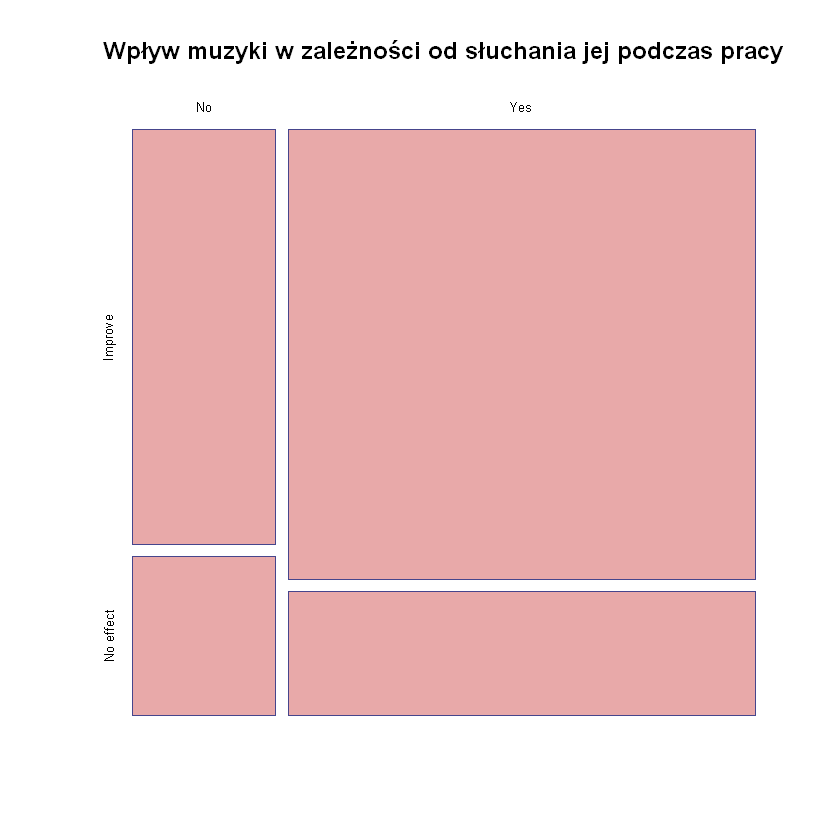

In [726]:
plot(whileWorking_musicEffects, main="Wpływ muzyki w zależności od słuchania jej podczas pracy", col="#E8A9A9", border="#46458C")

Sumy obserwacji oraz liczebności brzegowe:

In [727]:
margin_rows <- margin.table(whileWorking_musicEffects, 1)
margin_cols <- margin.table(whileWorking_musicEffects, 2)
total <- sum(margin_rows)

Liczba stopni swobody:

In [728]:
df <- (length(margin_rows)-1)*(length(margin_cols)-1)

Tablica wartości oczekiwanych dzięki funkcji <i>outer(margin_rows, margin_cols)</i>, wykonującej iloczyn zewnętrzny/Kroneckera (iloczyny wszystkich kombinacji współrzędnych wektorów).

In [729]:
E = outer(margin_rows, margin_cols) / total
E

,Improve,No effect
No,36.19,10.81
Yes,117.81,35.19


Wartość statystyki testowej:

In [730]:
chi2  <- sum((whileWorking_musicEffects - E)^2/E)
chi2

[1] 0.7532001

Wartość krytyczna:

In [731]:
qchisq(1 - alpha, df)

[1] 3.841459

Wartość statystyki testowej jest większa od wartości krytycznej. Zatem odrzucamy hipotezę zerową.

In [732]:
chisq.test(whileWorking_musicEffects, correct=FALSE)


	Pearson's Chi-squared test

data:  whileWorking_musicEffects
X-squared = 0.7532, df = 1, p-value = 0.3855


#### Test χ2 (zgodność z rozkładem)

Test do analizowania danych jakościowych w celu sprawdzenia, czy dane (próba 120 os.) mają określony rozkład. Oczekujemy, że podane niżej serwisy streamingowe mają równy rozkład. Sprawdźmy, czy rozkłady są takie same. Sformułowanie hipotezy:

H0 : rozkłady są takie same<br>
H1 : rozkłady są różne 

Próg istotności:

In [733]:
alpha = 0.05

In [734]:
library("dplyr")
sample2 <- data %>% sample_n(120)

sampleServices <- data.frame(opinion = c('Apple Music', 'I do not use a streaming service.', 'Other streaming service', 'Pandora', 'Spotify', 'YouTube Music'), number = matrix(table(sample2$Primary.streaming.service)))
sampleServices


opinion,number
<chr>,<int>
Apple Music,7
I do not use a streaming service.,10
Other streaming service,4
Pandora,3
Spotify,88
YouTube Music,8


Liczba stopni swobody:

In [735]:
dfServices <- length(sampleServices$number)-1

Tabela wartości oczekiwanych (rozkład nie jest równy ze względu na popularność jednego z serwisów - Spotify - przyjmując takie proporcje zwiększamy rzetelność testu):

In [736]:
Expected <- c(10, 20, 20, 10, 40, 20)

Wartość statystyki testowej:

In [737]:
chi2 <- sum((sampleServices$number-Expected)^2/Expected)
chi2

[1] 88.4

Wartość krytyczna:

In [738]:
qchisq(1 - alpha, dfServices)

[1] 11.0705

Wartość krytyczna jest zdecydowanie mniejsza niż wartość statystyki testowej (znajdujemy się w obszarze krytycznym) - odrzucamy hipotezę zerową. Zatem rozkłady są różne.

### Wnioski i obserwacje

1. Aby zaanalizować średnią liczbę beatów na minutę w słuchanych przez badanych utworach wykorzystany został test T. Przy poziomie istotności α = 0.01 nie było podstaw do odrzucenia hipotezy zerowej, która mówi, że średnia liczba uderzeń na minutę to 124.
2. Przeprowadzenie testów ch-kwadrat pozwoliło zbadać zależności pomiędzy rozkładami. Pierwszym statystycznie potwierdzonym stwierdzeniem jest to, że słuchanie muzyki w trakcie pracy oraz wpływ muzyki na samopoczucie są ze sobą powiązane. Innym wnioskiem jest fakt, iż jest mocna nierówność wśród serwisów streamingowych. Zdecydowanym faworytem wśród słuchaczy jest aplikacja Spotify, co zostało udowodnione testem chi-kwadrat, w którym już z góry zostały załozone nierówne proporcje, a i tak hipoteza zerowa została odrzucona.

Przeprowadzona analiza obejmowała różnorodne aspekty i cechy zawarte w wybranej bazie danych. W jej trakcie starałam się zbadać jak najwięcej atrybutów i powiązań między nimi w sposób graficzny, jak i poprzez różne testy. Moim głównym pytaniem, które towarzyszyło mi przez cały czas ich badania to, jaki wpływ ma na nas słuchanie muzyki. Mam nadzieję, że udało mi się odpowiedzieć na to ciekawe zagadnienie, korzystając z zależności między nimi oraz prognoz, które podlegały statystycznemu potwierdzeniu.

##### Propozycje dalszych kroków


W ramach kontynuacji projektu należy zrobić głębszy research w ramach tego tematu. Zagadnienie odnośnie terapii poprzez muzykę jest dopiero badane, ale powstało wiele dokładniejszych opracowań i zbiorów danych, które mogłyby posłużyć lepszej analizie. Postawione tezy mogłyby być bardziej szczegółowe, a wnioski jeszcze ciekawsze.

### Bibliografia
1. https://statystyka.online/miary-tendencji-centralnej-teoria/
2. https://predictivesolutions.pl/test-niezaleznosci-chi-kwadrat-pearsona
3. https://www.tutorialspoint.com/r/r_bar_charts.htm
4. https://www.rdocumentation.org/
